In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics
from apyori import apriori

# Project description

E-commerce is a prevalent part of today’s commercial ecosystem. Due to its simplicity and efficiency, online shopping is in a constant unprecedented growth. This kind of commercialization went beyond usual shopping of physical products and became the standard way for certain digital material. Streaming platforms are now indeed the natural and standard way to access music, movies and series. These platforms went beyond the standard promotion of their products to offering personalized recommendations based on the likes and dislikes of the users. The Movielens dataset is a standard well known benchmark dataset in
recommendation research. It includes information about a large set of movies in addition to user, movie and rating triplets. 

In this notebook, we mine the latter dataset using Association Rule Mining to extract common associations between genres, on the one hand, and movies, on the other hand. We generate association rules on movies and on genres that can be used for recommendation.

# Plan

1. Importing the dataset
2. Exploratory data analysis
3. Association rule mining on movies
4. Association rule mining on genres

# 1. Importing the dataset

In [3]:
# Import the movie and rating datasets

movies = pd.read_csv('Data/ml-1m/movies.dat', sep='::', header=None, names=['movieId', 'title', 'genres'],  engine='python')
ratings = pd.read_csv('Data/ml-1m/ratings.dat', sep='::', header=None, names=['userId', 'movieId', 'rating', 'timestamp'],  engine='python')

In [4]:
movies

movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         Drama  
3881                         Drama  
3882                Drama|Thriller  

[3883 rows x 3 columns]

In [5]:
ratings

userId  movieId  rating  timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]

In [6]:
#Data counts

print('Number of movies: ' + str(len(movies)))
print('Number of users: ' + str(len(set(ratings['userId']))))
print('Number of movies in rating data: ' + str(len(set(ratings['movieId']))))

Number of movies: 3883
Number of users: 6040
Number of movies in rating data: 3706


In [7]:
#Dropping movies without ratings

movies = movies.loc[movies['movieId'].isin(ratings['movieId'])].reset_index(drop=True)
movies

movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3701     3948             Meet the Parents (2000)   
3702     3949          Requiem for a Dream (2000)   
3703     3950                    Tigerland (2000)   
3704     3951             Two Family House (2000)   
3705     3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3701                        Comedy  
3702                         Drama  
3703                         Drama  
3704                         Drama  
3705                Drama|Thriller  

[3706 rows x 3 columns]

# 2. Exploratory data analysis

### Rating distribution

In [8]:
#Counts of ratings

Counter(ratings['rating'])

Counter({5: 226310, 3: 261197, 4: 348971, 2: 107557, 1: 56174})

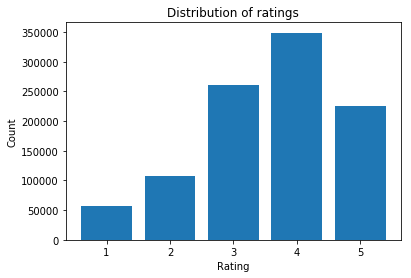

In [11]:
#Distribution of ratings

plt.figure()
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.bar(range(1, 6), [Counter(ratings['rating'])[i] for i in range(1, 6)])
plt.xticks(range(1, 6), range(1, 6))
plt.show()

We notice from the figure that the most abundant rating is 4. We also notice that the ratings 1 and 2 are scarce compared to the ratings between 3 and 5. This means that users are more likely to rate a movie if they like it than if they dislike it.

### Release year distribution

In [12]:
#Extracting the year from the dataset

movies['year'] = [int(x[-6:-1].replace('(', '').replace(')', '').replace('–', '')) if x[-6:-1].replace('(', '').replace(')', '').replace('–', '').isdigit() else np.nan for x in movies['title']]

In [13]:
movies

movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3701     3948             Meet the Parents (2000)   
3702     3949          Requiem for a Dream (2000)   
3703     3950                    Tigerland (2000)   
3704     3951             Two Family House (2000)   
3705     3952               Contender, The (2000)   

                            genres  year  
0      Animation|Children's|Comedy  1995  
1     Adventure|Children's|Fantasy  1995  
2                   Comedy|Romance  1995  
3                     Comedy|Drama  1995  
4                           Comedy  1995  
...                            ...   ...  
3701                        Comedy  2000  
3702                         Drama  2000  
3703                         Drama  2000  
3704                         Drama  2000  
3705                Drama|Thriller  2000  

[3706 rows x 4 columns]

In [15]:
#Movies with no year

print('Movies with no year: ' + str(len(movies[movies['year'].isna()])))

Movies with no year: 0


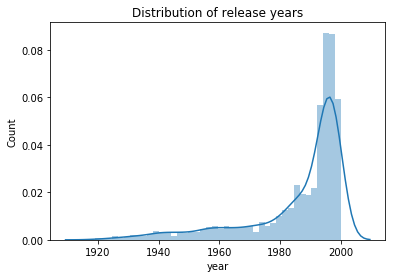

In [16]:
#Release year distribution

plt.figure()
plt.title('Distribution of release years')
plt.xlabel('Release years')
plt.ylabel('Count')
sns.distplot(movies['year'].dropna())
plt.show()

The release years range from 1919 to 2000 with a median of 1994. We notice that the distribution has the bell shape of the normal distribution with a right skew. Most of the movies are from the 1990-2000 eras. The long tail of the distribution includes the older movies from 1919 to the 1980s.

In [17]:
print('Min release year: ' + str(min(movies['year'])))
print('Max telease year: ' + str(max(movies['year'])))
print('Median telease year: ' + str(statistics.median(movies['year'])))

Min release year: 1919
Max telease year: 2000
Median telease year: 1994.0


### Genre distribution

In [18]:
#Split the genres into lists

movies['split_genres'] = [x.split('|') for x in movies['genres']]
movies

movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3701     3948             Meet the Parents (2000)   
3702     3949          Requiem for a Dream (2000)   
3703     3950                    Tigerland (2000)   
3704     3951             Two Family House (2000)   
3705     3952               Contender, The (2000)   

                            genres  year                      split_genres  
0      Animation|Children's|Comedy  1995   [Animation, Children's, Comedy]  
1     Adventure|Children's|Fantasy  1995  [Adventure, Children's, Fantasy]  
2                   Comedy|Romance  1995                 [Comedy, Romance]  
3                     Comedy|Drama  1995                   [Comedy, Drama]  
4                           Comedy  1995                          [Comedy]  
...                            ...   ...                               ...  
3701                        Comedy  2000                          [Comedy]  
3702                         Drama  2000                           [Drama]  
3703                         Drama  2000                           [Drama]  
3704                         Drama  2000                           [Drama]  
3705                Drama|Thriller  2000                 [Drama, Thriller]  

[3706 rows x 5 columns]

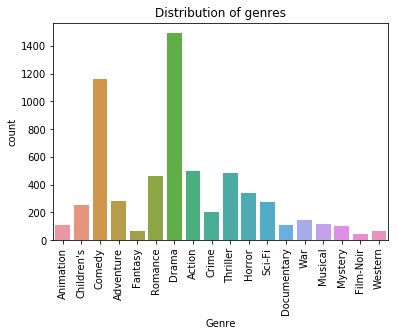

In [19]:
#Genre distribution

plt.figure()
plt.title('Distribution of genres')
plt.xlabel('Genre')
plt.ylabel('Count')
ax = sns.countplot([item for sublist in list(movies['split_genres']) for item in sublist])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We notice that the movies have 18 genres. The “Drama” and “Comedy” genres are the most frequent among all the genres. All the other genres have comparable frequencies with a higher abundance of “Action”, “Thriller” and “Romance” movies.

### Rating distribution per genre

In [20]:
#Determining the ratings per genre

ratings_per_genre = {genre: list(ratings.loc[ratings['movieId'].isin(list(movies.iloc[[i for i in range(len(movies)) if genre in movies['split_genres'][i]]]['movieId']))]['rating']) for genre in set([item for sublist in list(movies['split_genres']) for item in sublist])}
ratings_per_genre

{'War': [5,
  5,
  3,
  4,
  3,
  4,
  5,
  3,
  4,
  3,
  5,
  2,
  5,
  2,
  5,
  3,
  5,
  4,
  4,
  3,
  5,
  2,
  5,
  4,
  5,
  4,
  2,
  1,
  3,
  5,
  4,
  4,
  4,
  5,
  4,
  5,
  5,
  4,
  5,
  3,
  3,
  4,
  5,
  4,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  5,
  3,
  4,
  4,
  3,
  4,
  3,
  5,
  5,
  5,
  2,
  4,
  5,
  4,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  3,
  3,
  3,
  4,
  5,
  4,
  5,
  5,
  4,
  4,
  4,
  3,
  5,
  4,
  4,
  4,
  2,
  4,
  4,
  2,
  4,
  4,
  5,
  5,
  3,
  4,
  2,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  4,
  3,
  5,
  3,
  5,
  2,
  2,
  3,
  5,
  4,
  5,
  3,
  5,
  3,
  5,
  5,
  4,
  3,
  5,
  3,
  5,
  3,
  4,
  3,
  3,
  4,
  4,
  4,
  3,
  5,
  5,
  4,
  1,
  5,
  3,
  4,
  3,
  3,
  4,
  4,
  4,
  3,
  3,
  3,
  2,
  4,
  4,
  4,
  3,
  5,
  2,
  4,
  3,
  4,
  3,
  4,
  5,
  3,
  3,
  5,
  5,
  2,
  5,
  5,
  5,
  4,
  5,
  4,
  4,
  3,
  5,
  2,
  4,
  4,
  3,
  5,
  5,
  5

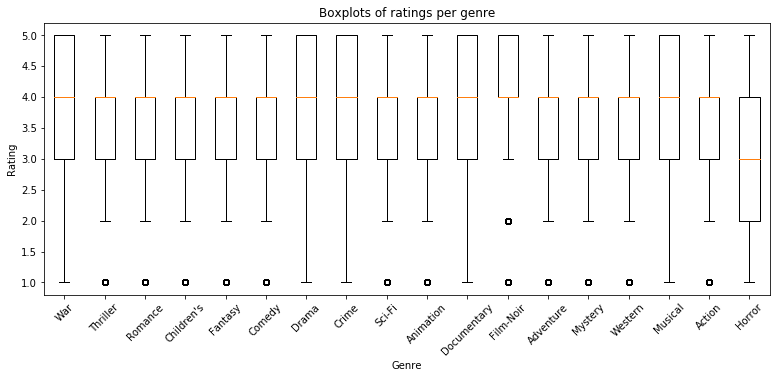

In [21]:
#Distributions of ratings per genre

labels, data = [*zip(*ratings_per_genre.items())]
plt.figure(figsize=(13, 5))
plt.title('Boxplots of ratings per genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
ax = plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
plt.show()

We notice that most of the genres present the same boxplots with a median rating of 4 and a 1st and 3rd quartiles of respectively 3 and 4. All the other genres, except “Horror” which boxplot is shifted down, have boxplots characteristic of higher ratings either with an upper shift upwards with the same interquartile range (IQR) or with a wider interquartile
range. The “Film-Noir” genre has the highest ratings with the narrowest interquartile range of the boxtplot that is on the foremost top. On the other hand, the “Horror” genre has the lowest ratings with the wider boxplot shifted to the bottom of the figure.

# 3. Association rule mining on movies

### Data preparation for association rule mining on movies

In [22]:
#Filtering ratings > 2.5 as high ratings

high_ratings = ratings.loc[ratings['rating'] > 2.5].reset_index(drop=True)
high_ratings

userId  movieId  rating  timestamp
0            1     1193       5  978300760
1            1      661       3  978302109
2            1      914       3  978301968
3            1     3408       4  978300275
4            1     2355       5  978824291
...        ...      ...     ...        ...
836473    6040     1090       3  956715518
836474    6040     1094       5  956704887
836475    6040      562       5  956704746
836476    6040     1096       4  956715648
836477    6040     1097       4  956715569

[836478 rows x 4 columns]

In [23]:
#Converting data to list of lists

list_of_liked_movies_per_user = [[list(movies[movies['movieId'] == movie]['title'])[0] for movie in high_ratings[high_ratings['userId'] == user]['movieId']] for user in sorted(list(set(ratings['userId'])))]
list_of_liked_movies_per_user

[["One Flew Over the Cuckoo's Nest (1975)",
  'James and the Giant Peach (1996)',
  'My Fair Lady (1964)',
  'Erin Brockovich (2000)',
  "Bug's Life, A (1998)",
  'Princess Bride, The (1987)',
  'Ben-Hur (1959)',
  'Christmas Story, A (1983)',
  'Snow White and the Seven Dwarfs (1937)',
  'Wizard of Oz, The (1939)',
  'Beauty and the Beast (1991)',
  'Gigi (1958)',
  'Miracle on 34th Street (1947)',
  "Ferris Bueller's Day Off (1986)",
  'Sound of Music, The (1965)',
  'Airplane! (1980)',
  'Tarzan (1999)',
  'Bambi (1942)',
  'Awakenings (1990)',
  'Big (1988)',
  'Pleasantville (1998)',
  'Wallace & Gromit: The Best of Aardman Animation (1996)',
  'Back to the Future (1985)',
  "Schindler's List (1993)",
  'Meet Joe Black (1998)',
  'Pocahontas (1995)',
  'E.T. the Extra-Terrestrial (1982)',
  'Titanic (1997)',
  'Ponette (1996)',
  'Close Shave, A (1995)',
  'Antz (1998)',
  'Girl, Interrupted (1999)',
  'Hercules (1997)',
  'Aladdin (1992)',
  'Mulan (1998)',
  'Hunchback of Notre 

In [24]:
print('Average number of movies liked per user: ' + str(np.mean([len(x) for x in list_of_liked_movies_per_user])))
print('Median number of movies liked per user: ' + str(np.median([len(x) for x in list_of_liked_movies_per_user])))
print('Minimum number of movies liked per user: ' + str(min([len(x) for x in list_of_liked_movies_per_user])))
print('Maximum number of movies liked per user: ' + str(max([len(x) for x in list_of_liked_movies_per_user])))

Average number of movies liked per user: 138.48973509933774
Median number of movies liked per user: 81.0
Minimum number of movies liked per user: 0
Maximum number of movies liked per user: 1968


### Association rules on movies

In [25]:
#Applying association rules: support = 0.1% (itemset of movies liked by at least 604 users) and confidence = 20%

association_rules = apriori(list_of_liked_movies_per_user, min_support=0.1, min_confidence=0.2, min_lift=3, min_length=3)

In [26]:
association_rules = list(association_rules)

In [27]:
association_rules

[RelationRecord(items=frozenset({'Air Force One (1997)', 'Rock, The (1996)'}), support=0.10033112582781457, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Air Force One (1997)'}), items_add=frozenset({'Rock, The (1996)'}), confidence=0.6338912133891214, lift=3.1563915324569605), OrderedStatistic(items_base=frozenset({'Rock, The (1996)'}), items_add=frozenset({'Air Force One (1997)'}), confidence=0.4995877988458368, lift=3.1563915324569605)]),
 RelationRecord(items=frozenset({'Beauty and the Beast (1991)', 'Aladdin (1992)'}), support=0.11357615894039735, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Aladdin (1992)'}), items_add=frozenset({'Beauty and the Beast (1991)'}), confidence=0.5586319218241043, lift=3.514725841476656), OrderedStatistic(items_base=frozenset({'Beauty and the Beast (1991)'}), items_add=frozenset({'Aladdin (1992)'}), confidence=0.7145833333333333, lift=3.514725841476656)]),
 RelationRecord(items=frozenset({'Lion King, The (1994)', 'Aladdin 

In [28]:
#Print association rules on movies

for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Air Force One (1997) -> Rock, The (1996)
Support: 0.10033112582781457
Confidence: 0.6338912133891214
Lift: 3.1563915324569605
Rule: Beauty and the Beast (1991) -> Aladdin (1992)
Support: 0.11357615894039735
Confidence: 0.5586319218241043
Lift: 3.514725841476656
Rule: Lion King, The (1994) -> Aladdin (1992)
Support: 0.11804635761589403
Confidence: 0.5806188925081432
Lift: 3.4081031202615986
Rule: American Pie (1999) -> Austin Powers: The Spy Who Shagged Me (1999)
Support: 0.1130794701986755
Confidence: 0.5701168614357262
Lift: 3.055462150019331
Rule: Blazing Saddles (1974) -> Animal House (1978)
Support: 0.10149006622516556
Confidence: 0.5492831541218638
Lift: 3.162698046612066
Rule: Austin Powers: International Man of Mystery (1997) -> There's Something About Mary (1998)
Support: 0.10529801324503311
Confidence: 0.6097794822627037
Lift: 3.011502921395528
Rule: Indiana Jones and the Temple of Doom (1984) -> Batman (1989)
Support: 0.11655629139072848
Confidence: 0.5609561752988048
L

Support: 0.10496688741721855
Confidence: 0.5630550621669628
Lift: 3.190293222784667
Rule: Matrix, The (1999) -> Star Trek IV: The Voyage Home (1986)
Support: 0.10596026490066225
Confidence: 0.8556149732620321
Lift: 3.8827306074400254
Rule: Matrix, The (1999) -> Star Trek: The Wrath of Khan (1982)
Support: 0.10662251655629139
Confidence: 0.6822033898305085
Lift: 3.0957990041895354
Rule: Mission: Impossible (1996) -> Rock, The (1996)
Support: 0.10182119205298014
Confidence: 0.656350053361793
Lift: 3.2682228543324237
Rule: Mission: Impossible (1996) -> True Lies (1994)
Support: 0.10115894039735099
Confidence: 0.6520811099252934
Lift: 3.1408053460516525
Rule: Terminator, The (1984) -> Predator (1987)
Support: 0.12417218543046357
Confidence: 0.6019261637239165
Lift: 3.1586742214530457
Rule: Terminator, The (1984) -> Men in Black (1997)
Support: 0.11390728476821192
Confidence: 0.5521669341894061
Lift: 3.2285462560542233
Rule: Rock, The (1996) -> Men in Black (1997)
Support: 0.107119205298013

Support: 0.1162251655629139
Confidence: 0.8059701492537313
Lift: 3.094761412264804
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Aliens (1986)
Support: 0.13129139072847681
Confidence: 0.7859266600594649
Lift: 3.0177984912645694
Rule: Aliens (1986) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10960264900662252
Confidence: 0.8063337393422655
Lift: 3.096157524238578
Rule: Matrix, The (1999) -> Jurassic Park (1993)
Support: 0.10397350993377484
Confidence: 0.6723768736616702
Lift: 3.5283721259048546
Rule: Matrix, The (1999) -> Jurassic Park (1993)
Support: 0.10347682119205298
Confidence: 0.6691648822269807
Lift: 3.036631020774578
Rule: Jurassic Park (1993) -> Aliens (1986)
Support: 0.10711920529801325
Confidence: 0.6482965931863728
Lift: 3.4020081866600274
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Jurassic Park (1993)
Support: 0.11009933774834436
Confidence: 0.648780487804878
Lift: 3.404547477273208
Rule: Star Wars: Episode VI - Return of the Jed

Rule: Die Hard (1988) -> Hunt for Red October, The (1990)
Support: 0.11506622516556292
Confidence: 0.820543093270366
Lift: 3.150718552671971
Rule: Die Hard (1988) -> Hunt for Red October, The (1990)
Support: 0.10811258278145695
Confidence: 0.7848557692307693
Lift: 3.013686488336838
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Die Hard (1988)
Support: 0.11158940397350993
Confidence: 0.7929411764705883
Lift: 3.0447328072996522
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Die Hard (1988)
Support: 0.10612582781456954
Confidence: 0.8032581453634086
Lift: 3.0843478690368644
Rule: Die Hard (1988) -> Hunt for Red October, The (1990)
Support: 0.10562913907284768
Confidence: 0.8506666666666667
Lift: 3.2253776940782592
Rule: Terminator, The (1984) -> Die Hard (1988)
Support: 0.10745033112582782
Confidence: 0.7953431372549019
Lift: 3.0539558480734947
Rule: Die Hard (1988) -> Hunt for Red October, The (1990)
Support: 0.10182119205298014
Confidence: 0.8333333333333334

Lift: 3.125631505078145
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.12201986754966887
Confidence: 0.7848775292864749
Lift: 3.013770042524036
Rule: Superman (1978) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.10215231788079471
Confidence: 0.8150594451783355
Lift: 3.129662459553176
Rule: Terminator, The (1984) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.15463576158940398
Confidence: 0.7835570469798658
Lift: 3.0086996590962425
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Indiana Jones and the Last Crusade (1989)
Support: 0.13029801324503312
Confidence: 0.8063524590163935
Lift: 3.0962294039790317
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10612582781456954
Confidence: 0.8324675324675325
Lift: 3.1965059733654773
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> When Harry Met Sally... (1989)

Rule: Star Wars: Episode IV - A New Hope (1977) -> Alien (1979)
Support: 0.10033112582781457
Confidence: 0.8559322033898306
Lift: 3.0057154119038234
Rule: Star Wars: Episode IV - A New Hope (1977) -> Alien (1979)
Support: 0.10281456953642384
Confidence: 0.8613037447988904
Lift: 3.024578266619359
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Alien (1979)
Support: 0.10281456953642384
Confidence: 0.8783592644978784
Lift: 3.084470905562317
Rule: Alien (1979) -> Matrix, The (1999)
Support: 0.10016556291390728
Confidence: 0.8780841799709724
Lift: 3.0835049110608566
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Alien (1979)
Support: 0.10860927152317881
Confidence: 0.862023653088042
Lift: 3.0271063166580077
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Alien (1979)
Support: 0.11175496688741722
Confidence: 0.8642765685019206
Lift: 3.0350177172974417
Rule: Alien (1979) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.1016556291390

Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.11572847682119206
Confidence: 0.6274685816876122
Lift: 3.292710889133951
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10397350993377484
Confidence: 0.6923925027563396
Lift: 3.633406356775231
Rule: Star Wars: Episode IV - A New Hope (1977) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.10960264900662252
Confidence: 0.6573982125124131
Lift: 3.4497699422892922
Rule: Star Wars: Episode IV - A New Hope (1977) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.10877483443708609
Confidence: 0.6504950495049505
Lift: 3.4135448297218947
Rule: Star Wars: Episode IV - A New Hope (1977) -> Predator (1987)
Support: 0.11142384105960265
Confidence: 0.6496138996138997
Lift: 3.4089208980607766
Rule: Star Wars: Episode IV - A New Hope (1977) -> Predator (1987)
Support: 0.10182119205298014
Co

Lift: 3.1462874925388506
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10562913907284768
Confidence: 0.8264248704663213
Lift: 3.173303380557267
Rule: Indiana Jones and the Last Crusade (1989) -> Die Hard (1988)
Support: 0.10099337748344371
Confidence: 0.8379120879120879
Lift: 3.2174119586707
Rule: Indiana Jones and the Last Crusade (1989) -> Die Hard (1988)
Support: 0.10132450331125828
Confidence: 0.8073878627968338
Lift: 3.100205143860697
Rule: Indiana Jones and the Last Crusade (1989) -> Die Hard (1988)
Support: 0.10066225165562914
Confidence: 0.8238482384823849
Lift: 3.1634096379107466
Rule: Lethal Weapon (1987) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10215231788079471
Confidence: 0.7859872611464969
Lift: 3.1089476472330326
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.10165562913907285
Confidence: 0.7922580645161291
Lift: 3.1337516107907137
Rule: In

Lift: 3.0841701499806824
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Die Hard (1988)
Support: 0.10314569536423841
Confidence: 0.8154450261780105
Lift: 3.091831737674315
Rule: Die Hard (1988) -> Saving Private Ryan (1998)
Support: 0.10413907284768212
Confidence: 0.8179453836150845
Lift: 3.1013120634244262
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10182119205298014
Confidence: 0.803921568627451
Lift: 3.048139532021221
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10132450331125828
Confidence: 0.8418156808803301
Lift: 3.1918184008268637
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Speed (1994)
Support: 0.10132450331125828
Confidence: 0.8511821974965229
Lift: 3.227332374688637
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10215231788079471
Con

Confidence: 0.6329233680227059
Lift: 3.3213354846717147
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode VI - Return of the Jedi (1983)
Support: 0.10231788079470198
Confidence: 0.643080124869927
Lift: 3.374634191324378
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Predator (1987)
Support: 0.11208609271523179
Confidence: 0.6338951310861423
Lift: 3.3264349189924407
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Predator (1987)
Support: 0.10397350993377484
Confidence: 0.6582809224318659
Lift: 3.4544020603722587
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Predator (1987)
Support: 0.10281456953642384
Confidence: 0.6915367483296214
Lift: 3.6289156906263362
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Predator (1987)
Support: 0.10811258278145695
Confidence: 0.6478174603174602
Lift: 3.399493883855308
Rule: Star Wars: Episode VI - Return of the Jedi (1983) -> Predator (1987)
Support: 0.10016556291

Confidence: 0.8545197740112994
Lift: 3.0007554854815397
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Princess Bride, The (1987)
Support: 0.10248344370860928
Confidence: 0.8780141843971632
Lift: 3.083259112650503
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.11026490066225166
Confidence: 0.8660598179453836
Lift: 3.0412798258082074
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.11423841059602649
Confidence: 0.8701134930643127
Lift: 3.0555148244816563
Rule: Star Wars: Episode IV - A New Hope (1977) -> Princess Bride, The (1987)
Support: 0.10331125827814569
Confidence: 0.8776371308016877
Lift: 3.0819350407222057
Rule: Star Wars: Episode IV - A New Hope (1977) -> Princess Bride, The (1987)
Support: 0.10546357615894039
Confidence: 0.8774104683195593
Lift: 3.0811390864244985
Rule: Star Wars: Episode IV - A New Hope (1977) -> Princess Brid

Support: 0.10778145695364238
Confidence: 0.8335467349551857
Lift: 3.200649891372741
Rule: Indiana Jones and the Last Crusade (1989) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10281456953642384
Confidence: 0.8414634146341463
Lift: 3.231048330826601
Rule: Indiana Jones and the Last Crusade (1989) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10215231788079471
Confidence: 0.8510344827586207
Lift: 3.267799285354144
Rule: Indiana Jones and the Last Crusade (1989) -> Star Wars: Episode IV - A New Hope (1977)
Support: 0.10331125827814569
Confidence: 0.8308921438082556
Lift: 3.1904568013997863
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10629139072847682
Confidence: 0.8392156862745097
Lift: 3.222417511187564
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10529801324503311
Confidence: 0.8468708388814914
Lift: 3.251811739888244
Rule: 

Support: 0.10115894039735099
Confidence: 0.8666666666666666
Lift: 3.3278236914600545
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.10364238410596026
Confidence: 0.8670360110803323
Lift: 3.3292418988717145
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.10198675496688742
Confidence: 0.8158940397350993
Lift: 3.1328671328671325
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.11605960264900662
Confidence: 0.8548780487804878
Lift: 3.2825577969702135
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.10546357615894039
Confidence: 0.8619756427604871
Lift: 3.3098111139690665
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Lethal Weapon (1987)
Support: 0.10877483443708609
Confidence: 0.8610747051114024
Lift: 3.3063516966769675
Rule: Lethal Weapon (1987) -> Indiana Jones and the Last Crusade (1989

Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10281456953642384
Confidence: 0.8403247631935048
Lift: 3.2266761409337374
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10281456953642384
Confidence: 0.8280000000000001
Lift: 3.179351557533376
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10082781456953642
Confidence: 0.8376891334250344
Lift: 3.2165558587966987
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10099337748344371
Confidence: 0.87018544935806
Lift: 3.34133510115873
Rule: Star Wars: Episode V - The Empire Strikes Back (1980) -> Indiana Jones and the Last Crusade (1989)
Support: 0.10066225165562914
Confidence: 0.856338028169014
Lift: 3.2881638208142685
Rule: Star Wars: Episode V - The Empire Strikes Back (19

In [29]:
print('Number of association rules: ' + str(len(association_rules)))
print('Average support: ' + str(np.mean([item[1] for item in association_rules])))
print('Average confidence: ' + str(np.mean([item[2][0][2] for item in association_rules])))
print('Average lift: ' + str(np.mean([item[2][0][3] for item in association_rules])))

Number of association rules: 6415
Average support: 0.10758469130194648
Average confidence: 0.770180320561417
Average lift: 3.1611363995880923


We applied the Apriori algorithm on the “association rule data on movies”. We obtained 6,415 association rules that recommend movies based on a set of previously liked movies. These association rules have an average support of 10.75%, an average confidence of 77%, and an average lift of 3.35.

The obtained association rules may serve for recommendation. For example, based on the first association rule, if the user liked the movie “Air Force One”, they are likely, with 63% confidence, to also like the movie “The Rock”. Of course, the higher the confidence of an association rule, the more accurate the recommendation is.

# 4. Association rule mining on genres

### Data preparation for association rule mining on genres

In [30]:
high_ratings

userId  movieId  rating  timestamp
0            1     1193       5  978300760
1            1      661       3  978302109
2            1      914       3  978301968
3            1     3408       4  978300275
4            1     2355       5  978824291
...        ...      ...     ...        ...
836473    6040     1090       3  956715518
836474    6040     1094       5  956704887
836475    6040      562       5  956704746
836476    6040     1096       4  956715648
836477    6040     1097       4  956715569

[836478 rows x 4 columns]

In [31]:
#Creating genre data for association rule mining

list_of_liked_movie_genres = [list(movies[movies['movieId'] == movie]['split_genres'])[0] for movie in set(high_ratings['movieId'])]

In [32]:
list_of_liked_movie_genres

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Animation', "Children's"],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Thriller'],
 ['Comedy'],
 ['Action'],
 ['Action', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Romance'],
 ['Adventure', 'Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Sci-Fi'],
 ['Adventure', 'Romance'],
 ["Children's", 'Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Comedy'],
 ['Comedy', 'Romance'],
 ['Drama'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Drama'],
 ['Action', 'Adventure'],
 ['Comedy'

In [33]:
print('Number of liked movies: ' + str(len(list_of_liked_movie_genres)))
print('Average number of genres per liked movie: ' + str(np.mean([len(x) for x in list_of_liked_movie_genres])))
print('Median number of genres per liked movie: ' + str(np.median([len(x) for x in list_of_liked_movie_genres])))
print('Minimum number of genres per liked movie: ' + str(min([len(x) for x in list_of_liked_movie_genres])))
print('Maximum number of genres per liked movie: ' + str(max([len(x) for x in list_of_liked_movie_genres])))

Number of liked movies: 3628
Average number of genres per liked movie: 1.6797133406835723
Median number of genres per liked movie: 1.0
Minimum number of genres per liked movie: 1
Maximum number of genres per liked movie: 6


### Association rules on genres

In [34]:
#Applying association rules: support = 0.01% (itemset of genres present in at least 36 liked movies) and confidence = 20%

association_rules_genre = apriori(list_of_liked_movie_genres, min_support=0.01, min_confidence=0.2, min_lift=3, min_length=3)

In [35]:
association_rules_genre = list(association_rules_genre)

In [36]:
#Printing association rules on genres

for item in association_rules_genre:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Adventure -> Action
Support: 0.034729878721058434
Confidence: 0.25557809330628806
Lift: 3.347427157094632
Rule: Children's -> Adventure
Support: 0.021775082690187433
Confidence: 0.28519855595667876
Lift: 4.155423136589681
Rule: Sci-Fi -> Adventure
Support: 0.018191841234840134
Confidence: 0.23826714801444046
Lift: 3.189790453861218
Rule: Children's -> Animation
Support: 0.023153252480705624
Confidence: 0.8
Lift: 11.656224899598396
Rule: Children's -> Fantasy
Support: 0.010474090407938258
Confidence: 0.5588235294117647
Lift: 8.142215922513584
Rule: Children's -> Musical
Support: 0.010198456449834619
Confidence: 0.33944954128440363
Lift: 4.945875244095649
Rule: Mystery -> Thriller
Support: 0.01350606394707828
Confidence: 0.4803921568627451
Lift: 3.6461563704979905
Rule: Sci-Fi -> Adventure
Support: 0.010749724366041897
Confidence: 0.30952380952380953
Lift: 4.143735723071517


In [37]:
print('Number of association rules: ' + str(len(association_rules_genre)))
print('Average support: ' + str(np.mean([item[1] for item in association_rules_genre])))
print('Average confidence: ' + str(np.mean([item[2][0][2] for item in association_rules_genre])))
print('Average lift: ' + str(np.mean([item[2][0][3] for item in association_rules_genre])))

Number of association rules: 8
Average support: 0.017847298787210586
Average confidence: 0.4084041042950163
Average lift: 5.403356113415333


We also applied the Apriori algorithm on the “association rule on genres dataset” to determine which genres are usually liked together and characterize overall liked movies. We obtained 8 association rules with a 1.78% average support, a 40.84% average confidence and an average lift of 5.40.

These association rules can also be used for recommendation. For example, according to the first association rule, if the user mostly likes Adventure movies, we can say with 25.5% confidence that they will also like Action movies. Hence, we can recommend Action movies to them.